# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [83]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [84]:
# Set the API base URL
# url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | itarema
Processing Record 5 of Set 1 | quatre cocos
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | bon accord
Processing Record 12 of Set 1 | izumo
Processing Record 13 of Set 1 | hualmay
Processing Record 14 of Set 1 | tessalit
Processing Record 15 of Set 1 | kindersley
Processing Record 16 of Set 1 | eltham
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | viedma
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | upata
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | saint george
Processing Record 23 of Set 1 | hermanus
Proc

Processing Record 38 of Set 4 | polican
Processing Record 39 of Set 4 | black river
Processing Record 40 of Set 4 | glushkovo
Processing Record 41 of Set 4 | caxito
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | kenitra
Processing Record 44 of Set 4 | rzeszow
Processing Record 45 of Set 4 | hailin
Processing Record 46 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 47 of Set 4 | qorveh
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | evensk
Processing Record 0 of Set 5 | purpe
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | churhat
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | flinders
Processing Record 6 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | luan
Processing Record 9 of Set 5 | mahibadhoo
Processing

Processing Record 28 of Set 8 | sao caetano de odivelas
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | sunbury
Processing Record 31 of Set 8 | lincoln
Processing Record 32 of Set 8 | matagami
Processing Record 33 of Set 8 | novobirilyussy
Processing Record 34 of Set 8 | ankazoabo
Processing Record 35 of Set 8 | coihaique
Processing Record 36 of Set 8 | sambava
Processing Record 37 of Set 8 | buariki
City not found. Skipping...
Processing Record 38 of Set 8 | bilma
Processing Record 39 of Set 8 | concarneau
Processing Record 40 of Set 8 | nikolskoye
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | cayenne
Processing Record 43 of Set 8 | taoudenni
Processing Record 44 of Set 8 | sao bento
Processing Record 45 of Set 8 | krasnoselkup
Processing Record 46 of Set 8 | bargal
City not found. Skipping...
Processing Record 47 of Set 8 | bushehr
Processing Record 48 of Set 8 | bubaque
Processing Record 49 of Set 8 | k

Processing Record 14 of Set 12 | warora
Processing Record 15 of Set 12 | yushan
Processing Record 16 of Set 12 | kondagaon
Processing Record 17 of Set 12 | ust-nera
Processing Record 18 of Set 12 | ambalavao
Processing Record 19 of Set 12 | chilia veche
Processing Record 20 of Set 12 | altay
Processing Record 21 of Set 12 | assiniboia
Processing Record 22 of Set 12 | sembe
Processing Record 23 of Set 12 | gore
Processing Record 24 of Set 12 | biak
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | haapiti
Processing Record 28 of Set 12 | tubruq
City not found. Skipping...
Processing Record 29 of Set 12 | vodnyy
Processing Record 30 of Set 12 | bogo
Processing Record 31 of Set 12 | yerbogachen
Processing Record 32 of Set 12 | dzilam gonzalez
Processing Record 33 of Set 12 | eureka
Processing Record 34 of Set 12 | thinadhoo
Processing Record 35 of Set 12 | juegang
Processing Record 36 of Set 12 | adiake
Processing Record 37 o

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,10.27,98,100,1.08,NZ,1670184436
1,busselton,-33.6500,115.3333,15.34,72,100,5.89,AU,1670184165
2,kapaa,22.0752,-159.3190,25.99,84,11,2.24,US,1670183975
3,lochem,52.1592,6.4111,2.79,93,100,5.07,NL,1670184438
4,thompson,55.7435,-97.8558,-20.00,93,100,4.12,CA,1670184439


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,98,100,1.08,NZ,1670184436
1,busselton,-33.6500,115.3333,15.34,72,100,5.89,AU,1670184165
2,kapaa,22.0752,-159.3190,25.99,84,11,2.24,US,1670183975
3,lochem,52.1592,6.4111,2.79,93,100,5.07,NL,1670184438
4,thompson,55.7435,-97.8558,-20.00,93,100,4.12,CA,1670184439


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [51]:
test = datetime.fromtimestamp(city_data_df['Date'][0]

TypeError: 'datetime.datetime' object is not subscriptable

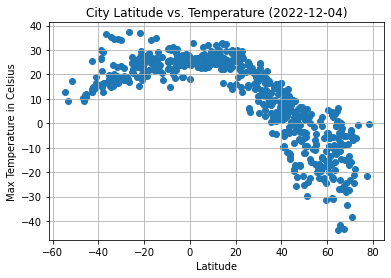

In [52]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_lat = city_data_df['Lat']
y_temp = city_data_df['Max Temp']
plt.scatter(x_lat,y_temp,marker='o')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celsius")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

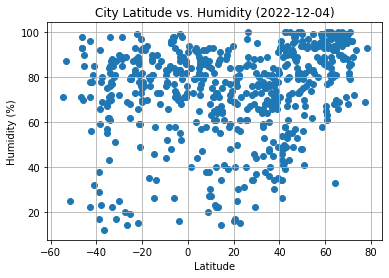

In [53]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
y_humid = city_data_df['Humidity']
plt.scatter(x_lat,y_humid,marker='o')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

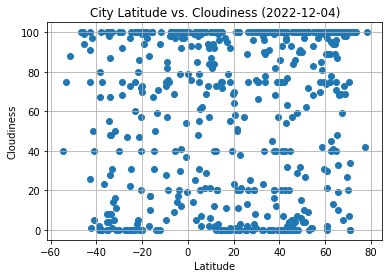

In [54]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
y_cloud = city_data_df['Cloudiness']
plt.scatter(x_lat,y_cloud,marker='o')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

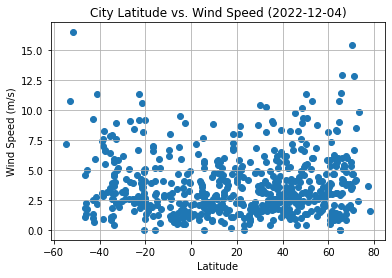

In [55]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y_wind = city_data_df['Wind Speed']
plt.scatter(x_lat,y_wind,marker='o')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
    plt.xlabel('Latitude')
#     plt.show()
    print(f"The r-value is: {rvalue}")
    return(line_eq)

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kapaa,22.0752,-159.3190,25.99,84,11,2.24,US,1670183975
3,lochem,52.1592,6.4111,2.79,93,100,5.07,NL,1670184438
4,thompson,55.7435,-97.8558,-20.00,93,100,4.12,CA,1670184439
5,kez,57.8979,53.7152,-13.93,95,70,2.25,RU,1670184440
8,podgorica,42.4411,19.2636,13.62,100,40,1.54,ME,1670184441


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,10.27,98,100,1.08,NZ,1670184436
1,busselton,-33.6500,115.3333,15.34,72,100,5.89,AU,1670184165
6,richards bay,-28.7830,32.0377,22.52,85,100,3.05,ZA,1670183996
7,ushuaia,-54.8000,-68.3000,12.79,71,40,7.20,AR,1670184441
9,bredasdorp,-34.5322,20.0403,16.47,62,98,2.59,ZA,1670184442


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8649476108633449


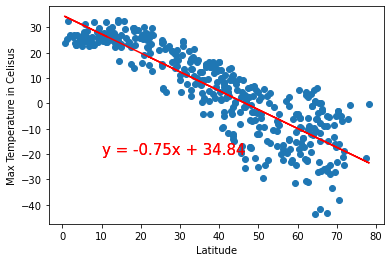

In [106]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
line = plot_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.annotate(line,(10,-20),fontsize=15,color="red")
plt.ylabel('Max Temperature in Celisus')
plt.show()


The r-value is: 0.5357350587547651


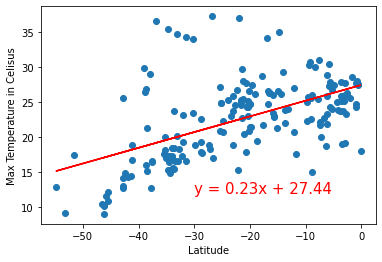

In [109]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
line = plot_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.ylabel('Max Temperature in Celisus')
plt.annotate(line,(-30,12),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There's a clear trend of temperature increasing towards the equator on both sides of the hemisphere (r-value is > 0.5 on both sides). The scatter splot on the southern hemisphere has a wider spread of points than the northern in this case

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.384116560566023


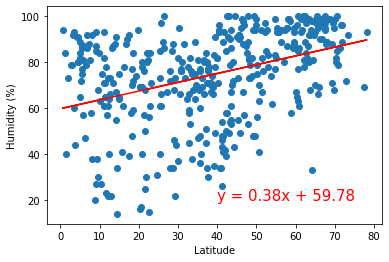

In [110]:
# Northern Hemisphere
# YOUR CODE HERE
line = plot_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.ylabel('Humidity (%)')
plt.annotate(line,(40,20),fontsize=15,color="red")
plt.show()

The r-value is: 0.17106642888293672


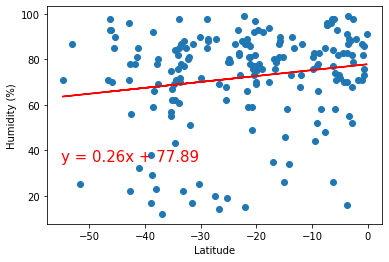

In [114]:
# Southern Hemisphere
# YOUR CODE HERE
line = plot_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.ylabel('Humidity (%)')
plt.annotate(line,(-55,35),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** The linear relationships for humidity are not particularly clear (also shown in r-value being low). In the northern hemisphere, the higher latitudes have higher humidities. The southern hemisphere doesn't really predict the humidity well since you can have any humidity at any latitude. For humidity it may be more interesting to view an average over a quarterly time instead of just one day. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16868221210684375


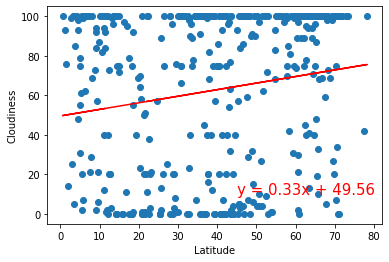

In [115]:
# Northern Hemisphere
# YOUR CODE HERE
line = plot_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.annotate(line,(45,10),fontsize=15,color="red")
plt.show()

The r-value is: 0.18697778261586756


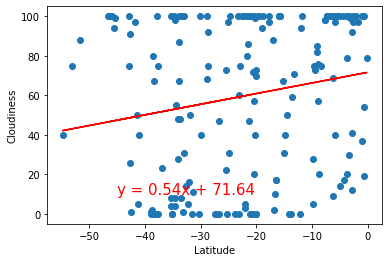

In [117]:
# Southern Hemisphere
# YOUR CODE HERE
line = plot_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.annotate(line,(-45,10),fontsize=15,color="red")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1558450819776001


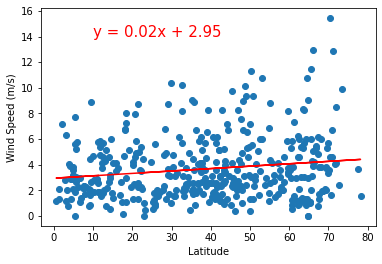

In [118]:
# Northern Hemisphere
# YOUR CODE HERE
line = plot_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line,(10,14),fontsize=15,color="red")
plt.show()

The r-value is: -0.2938218671642086


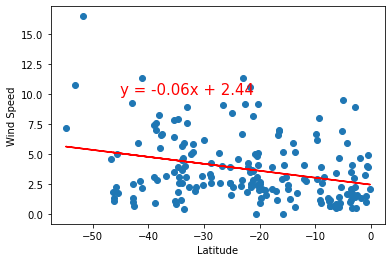

In [119]:
# Southern Hemisphere
# YOUR CODE HERE
line = plot_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.annotate(line,(-45,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** The linear relation is a weak relation on both sides (r value roughly 0.15 and 0.3). There's a large concentration of data points around the lower wind speeds, then the higher wind speeds might show a small pattern - in the northern hemisphere the highest wind speeds increase at higher latitudes, similarly in the southern. 